# Кластеризация. Домашнее задание

### Данные

В предложенных файлах информация с публичных слушаний Москвы по правилам землепользования и застройки (ПЗЗ). В них комментарии жителей города были застенагрофированы, проклассифицированы (за/против) и нанесены на карту. Данные предоставлены в 2 вариантах, для задания можно использовать любой:
* geo_comment.xlsx
    * **comment** - комментарий одного или списка жителей к проект
    * **multiplier** - количество авторов комментария (может быть 1, может быть список)
    * **x, y** - координаты адреса, по которому был дан определённой комментарий
    * **comment_class** - за (1) / против (-1)
* geo.xlsx - те же данные, но без текстов комментариев и по 1 голосу на строку (ранее в 1 строке могло быть **multiplier** > 1 голоса)
    * **x, y** - координаты адреса, по которому был дан определённой комментарий
    * **comment_class** - за (1) / против (-1)
    
### Обязательное задание

* визуально разделить город на районы безотносительно голосов (провести кластеризацию и вывести картинку)
* аналогично исследовать скопления голосов за и против отдельно
* *подобрать оптимальное число кластеров при помощи кода из тетрадки в конце занятия (оптимально)*
* приложить ноутбук

### Дополнительные задания
* найти наиболее активные в голосовании районы *(подсказка: DBSCAN, не плотные районы обозначены одной меткой и закрашены одним цветом, cmap='gray')*
* для тех, кто уже попробовал работу с текстом: выделить основные тематики комментариев жителей, можно использовать всю имеющуюся дополнительную информацию

In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN, AffinityPropagation
from sklearn.metrics import adjusted_rand_score, silhouette_score
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
%config InlineBackend.figure_format = 'retina'
from pylab import rcParams
rcParams['figure.figsize'] = (12, 9)

In [2]:
geo = pd.read_excel('geo.xlsx')
geo.head()

,Unnamed: 0,x,y,comment_class
0,0,37.612416,55.777454,-1
1,1,37.612416,55.777454,-1
2,2,37.603298,55.742108,-1
3,3,37.558526,55.728758,-1
4,4,37.566431,55.731794,-1


In [3]:
X = geo[['x','y']].to_numpy()

In [4]:
geo['vote'] = [1 if x==1 else 0 for x in geo['comment_class']]

In [5]:
y = geo['vote'].to_numpy()

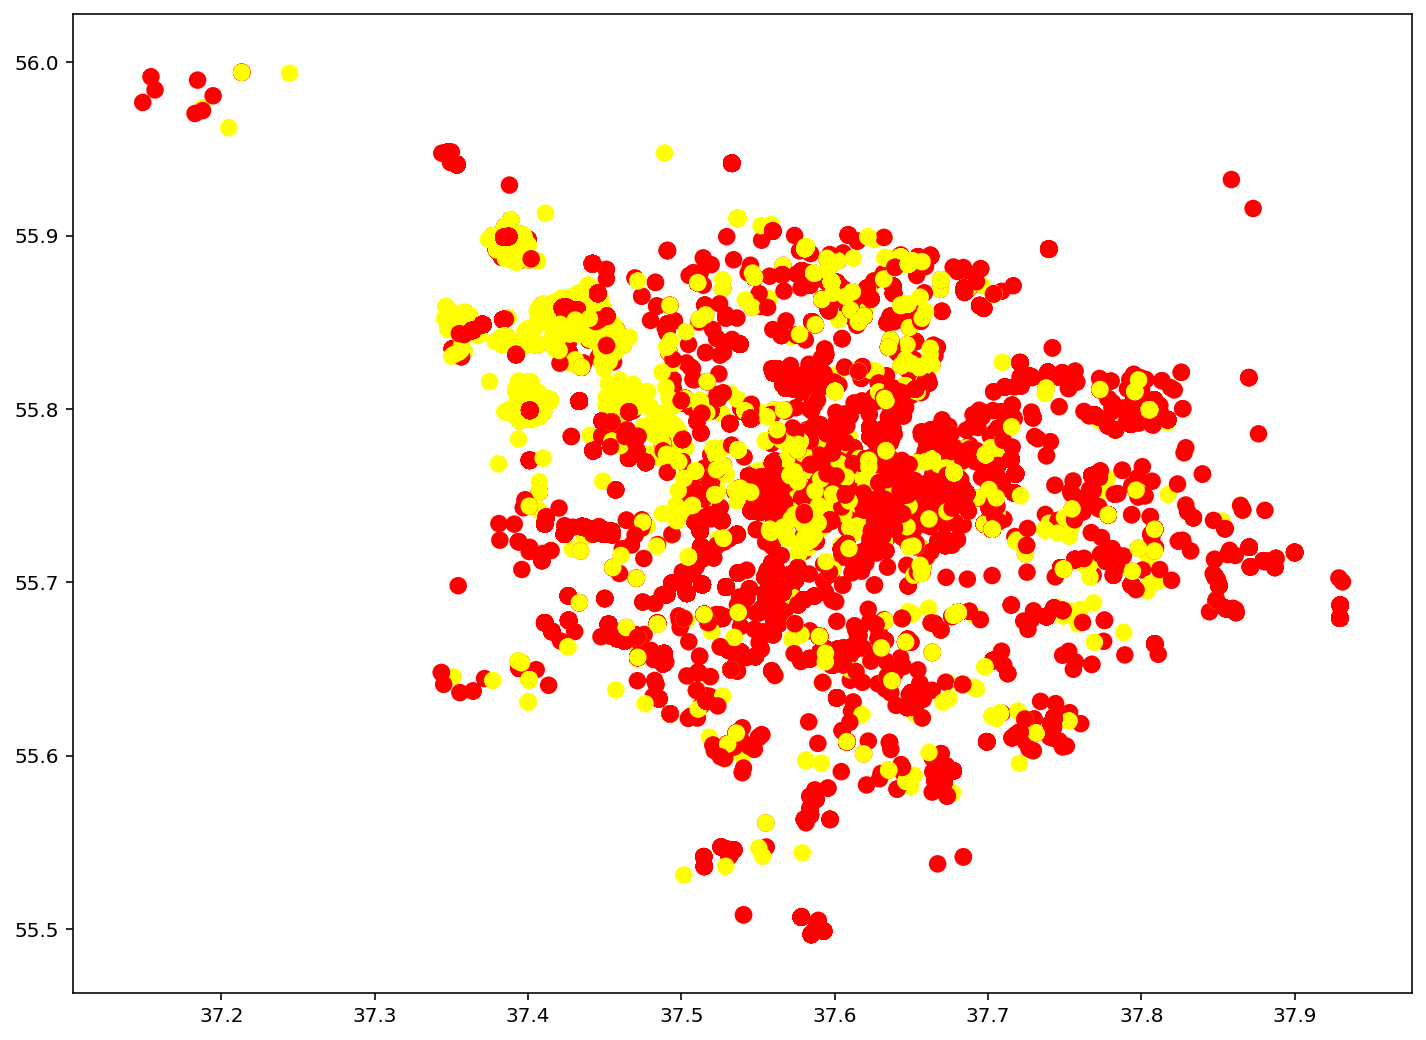

In [6]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='autumn', s=60)

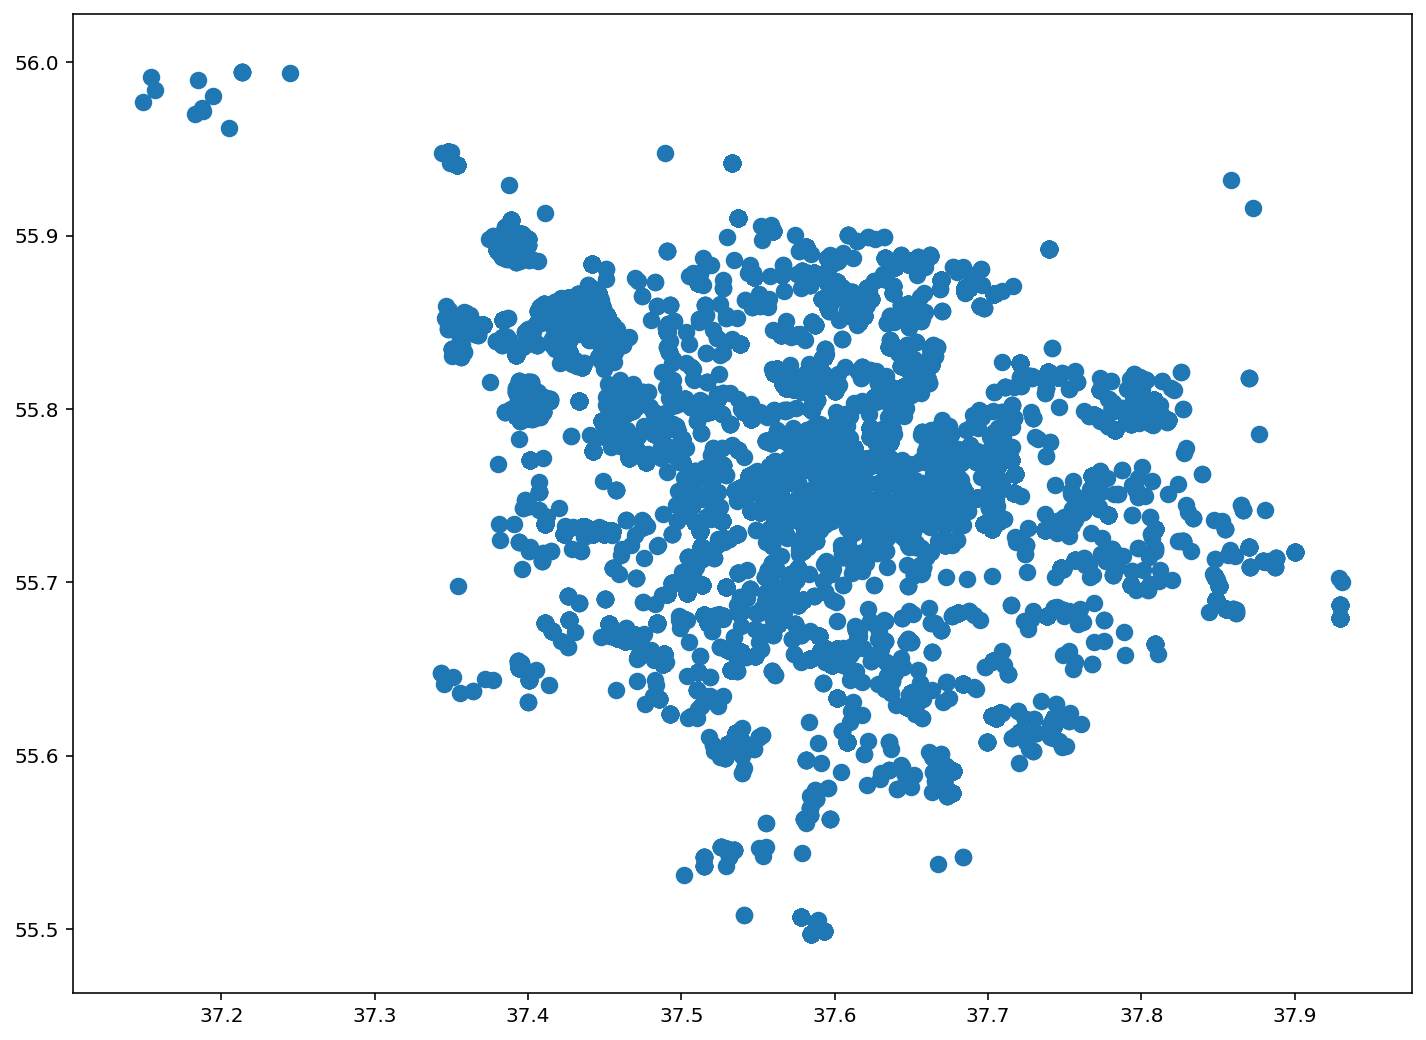

In [7]:
plt.scatter(X[:, 0], X[:, 1], cmap='autumn', s=60)

Приведем данные к нормальному распределению

In [8]:
from sklearn.preprocessing import StandardScaler

In [9]:
scaler = StandardScaler()

In [10]:
X_scaled = scaler.fit_transform(X)  # масштабируем

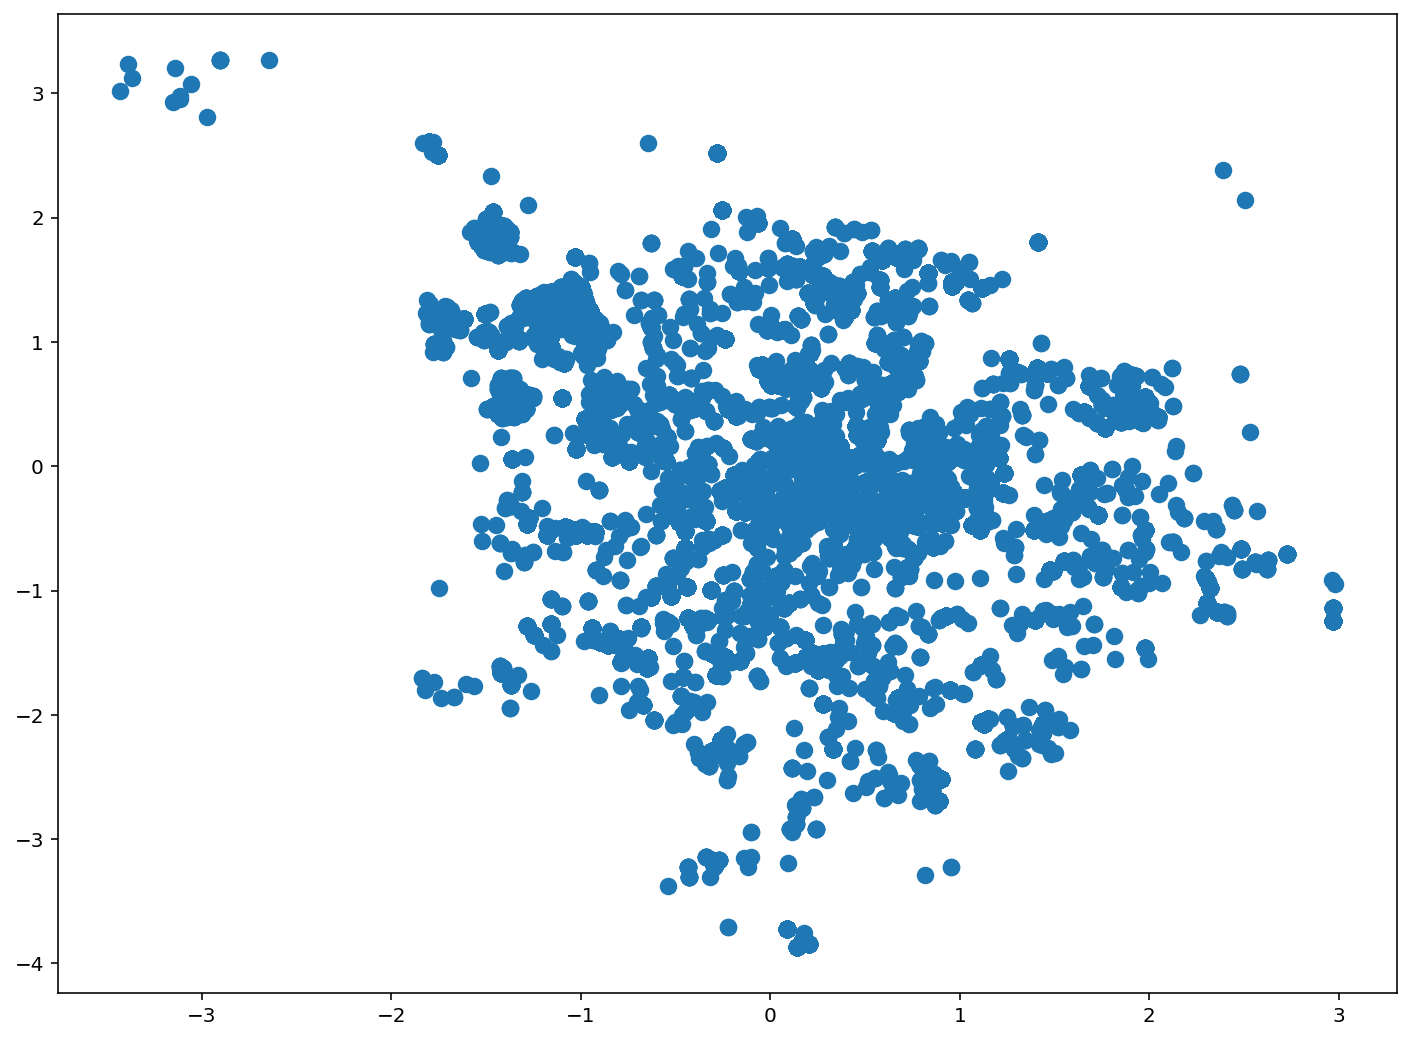

In [11]:
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], cmap='autumn', s=60)

Кластеризация города на районы безотносительно голосов
====

In [53]:
clusters = KMeans(n_clusters=2).fit_predict(X_scaled)

Text(0.5, 1.0, 'Kmeans')

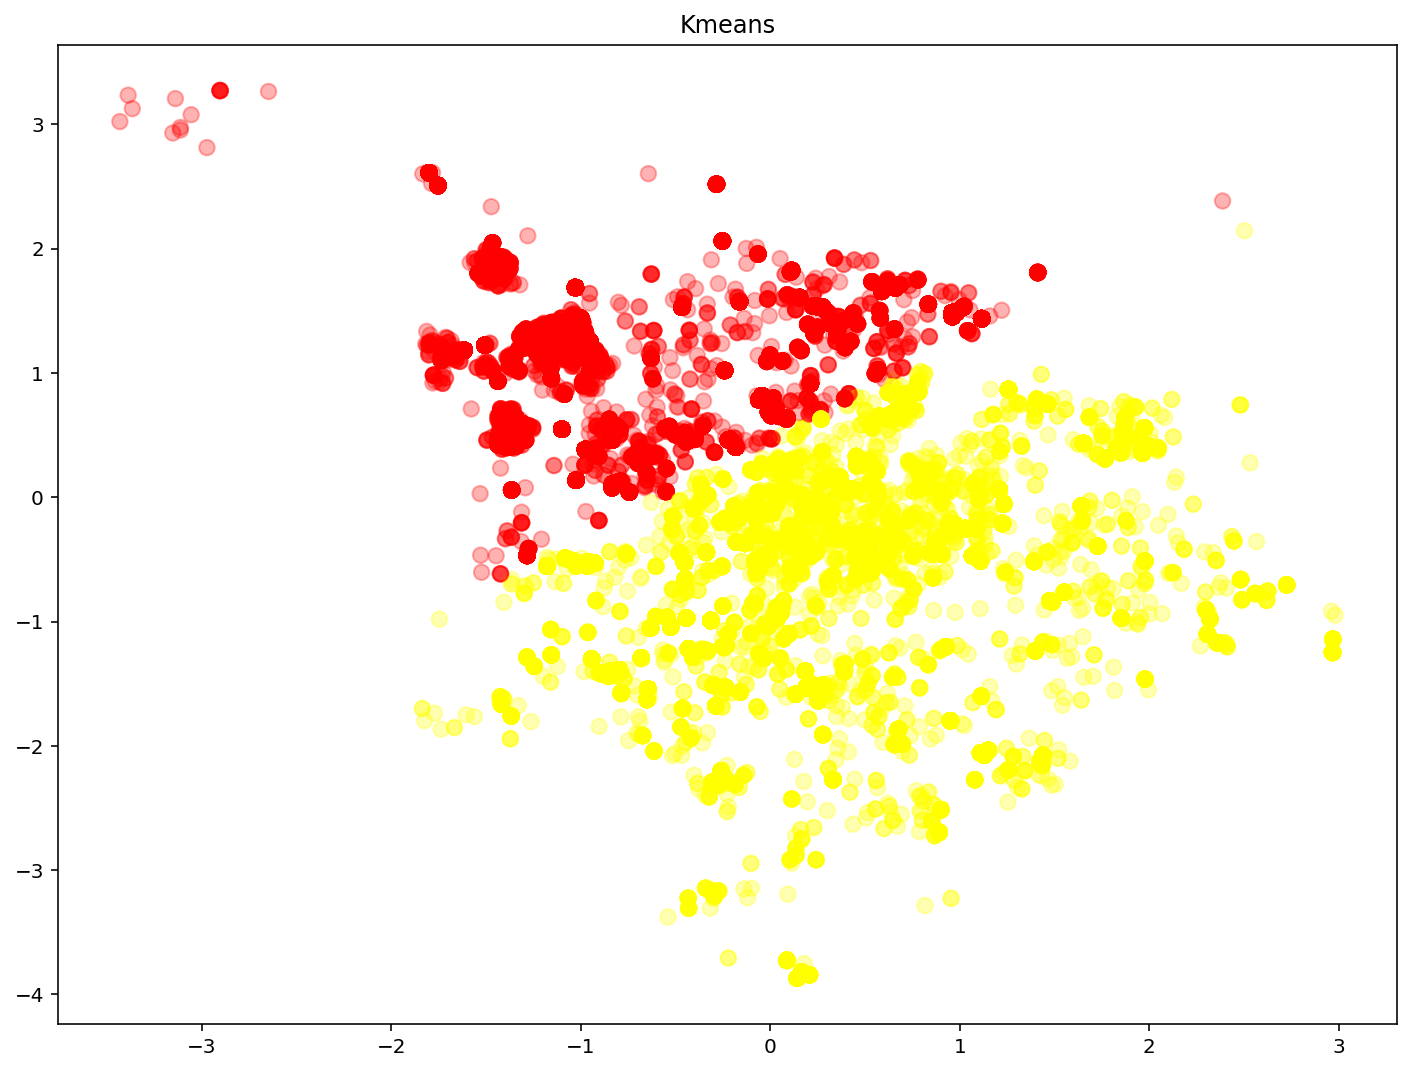

In [54]:
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap='autumn', s=60, alpha=0.3)
plt.title('Kmeans')

Подбор количества кластеров KMeans

In [56]:
k_inertia = []
ks = range(1,20)

for k in ks:
    clf_kmeans = KMeans(n_clusters=k)
    clusters_kmeans = clf_kmeans.fit_predict(X_scaled, )
    k_inertia.append(clf_kmeans.inertia_)

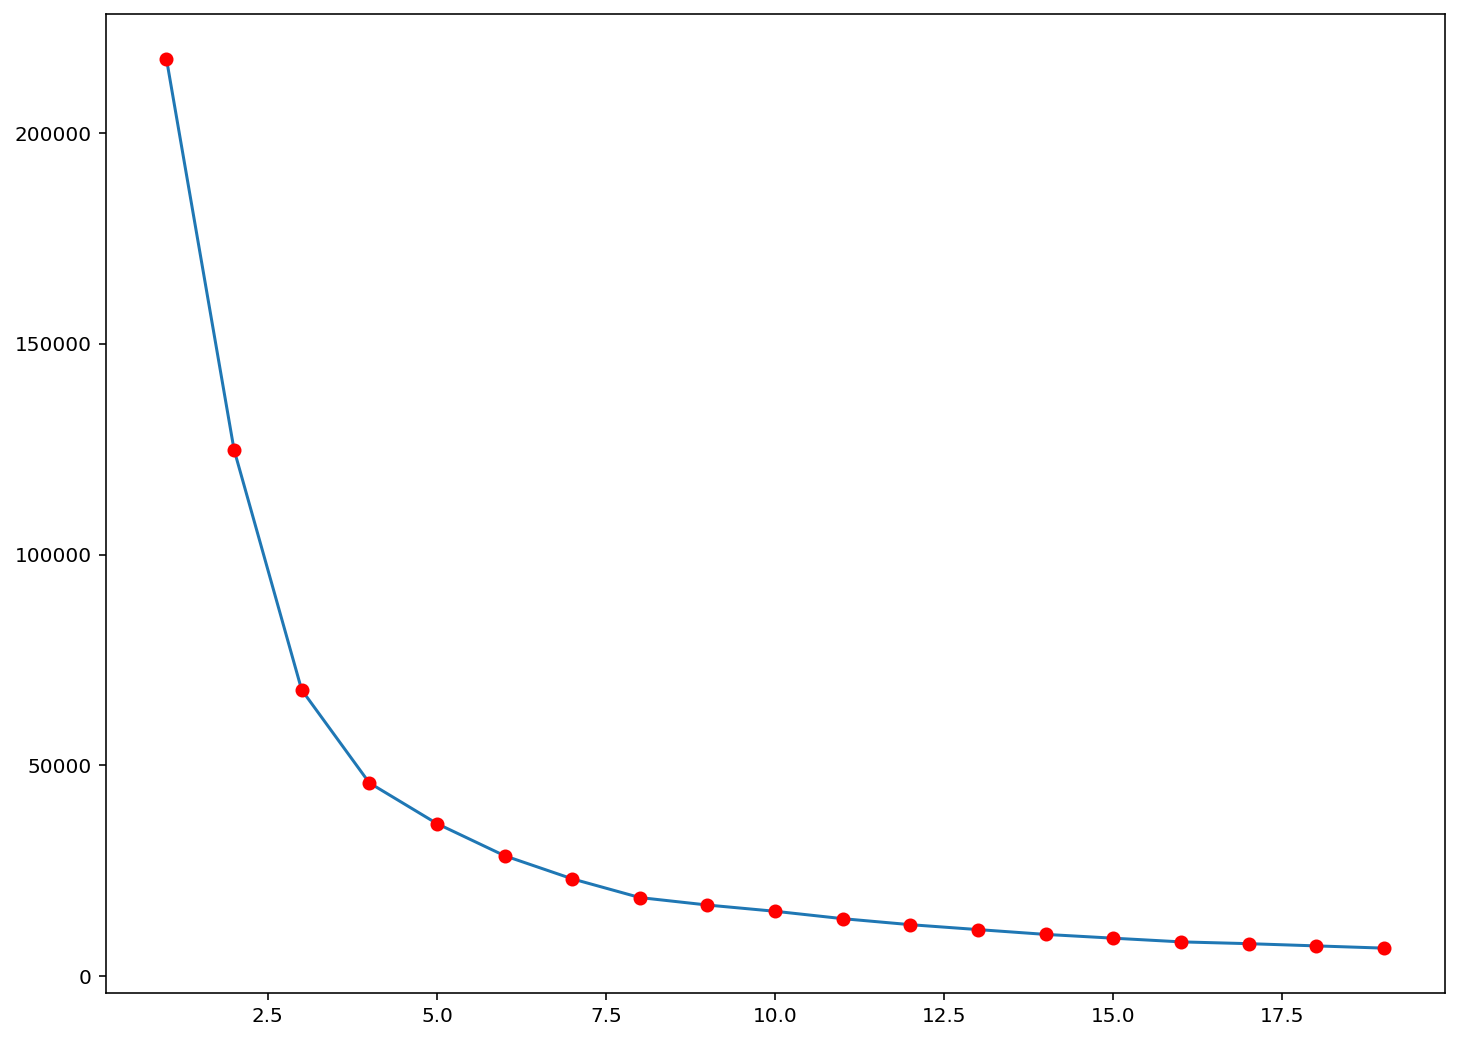

In [57]:
plt.plot(ks, k_inertia)
plt.plot(ks, k_inertia ,'ro')

Визуально: 4 кластера подходит

In [58]:
clusters = KMeans(n_clusters=4).fit_predict(X_scaled)

Text(0.5, 1.0, 'Kmeans')

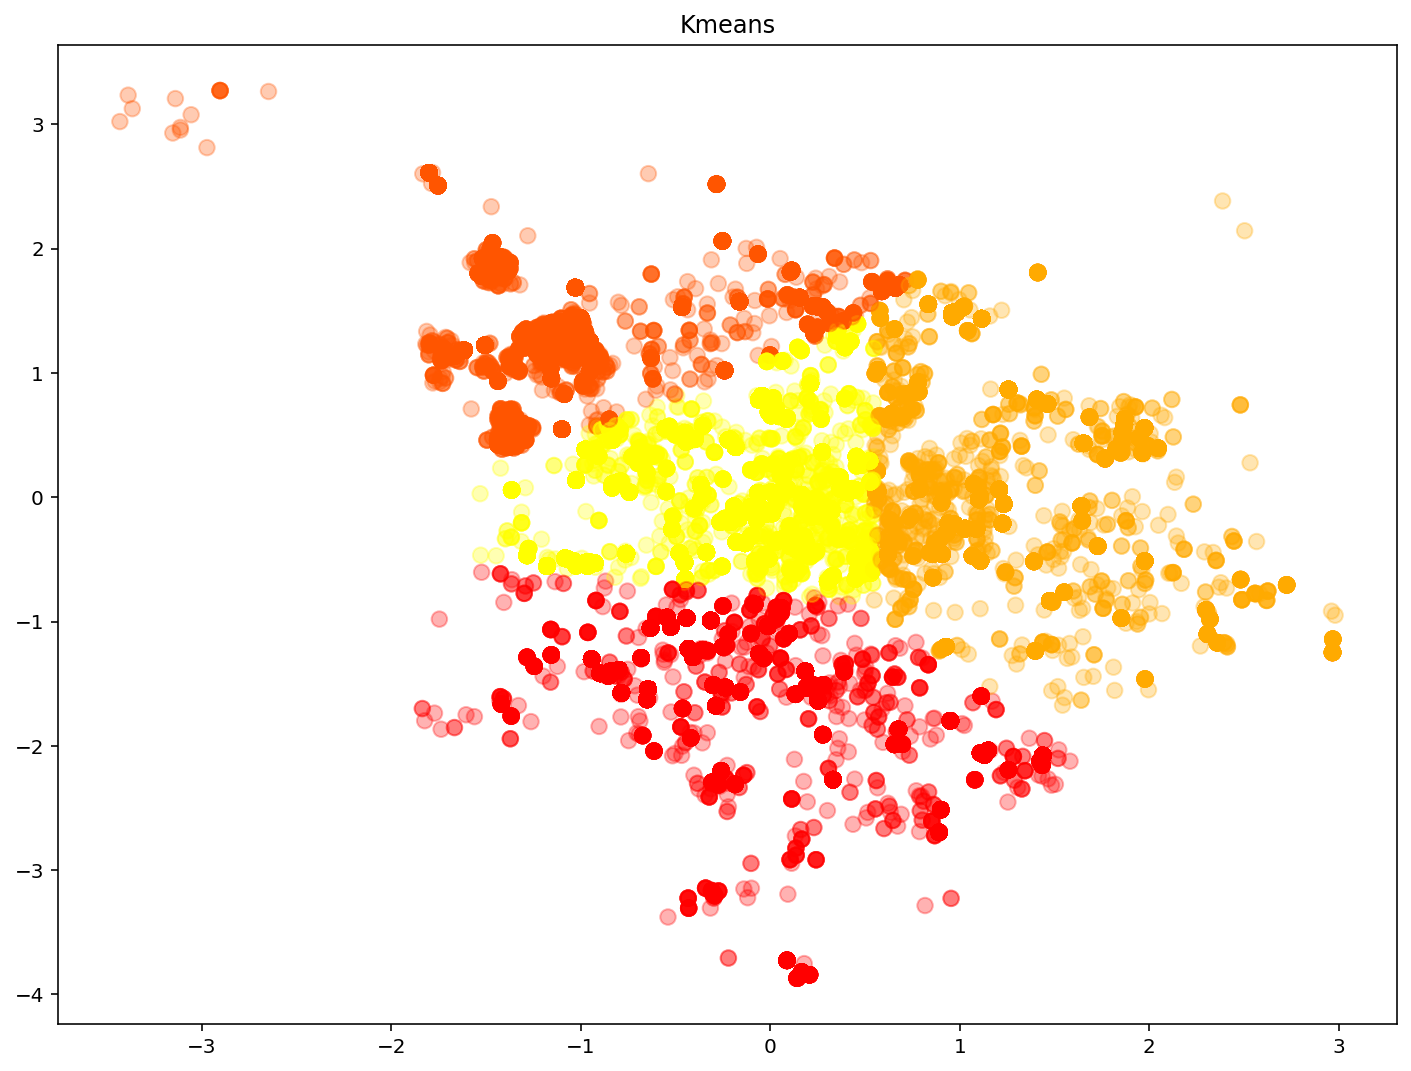

In [59]:
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap='autumn', s=60, alpha=0.3)
plt.title('Kmeans')

Отдельно голоса
=====

In [46]:
# разделим голоса да и нет
X_vote_0 = geo[geo['vote']==0][['x','y']].to_numpy()
X_vote_1 = geo[geo['vote']==1][['x','y']].to_numpy()

In [49]:
X_scaled_0 = scaler.fit_transform(X_vote_0) 
X_scaled_1 = scaler.fit_transform(X_vote_1) 

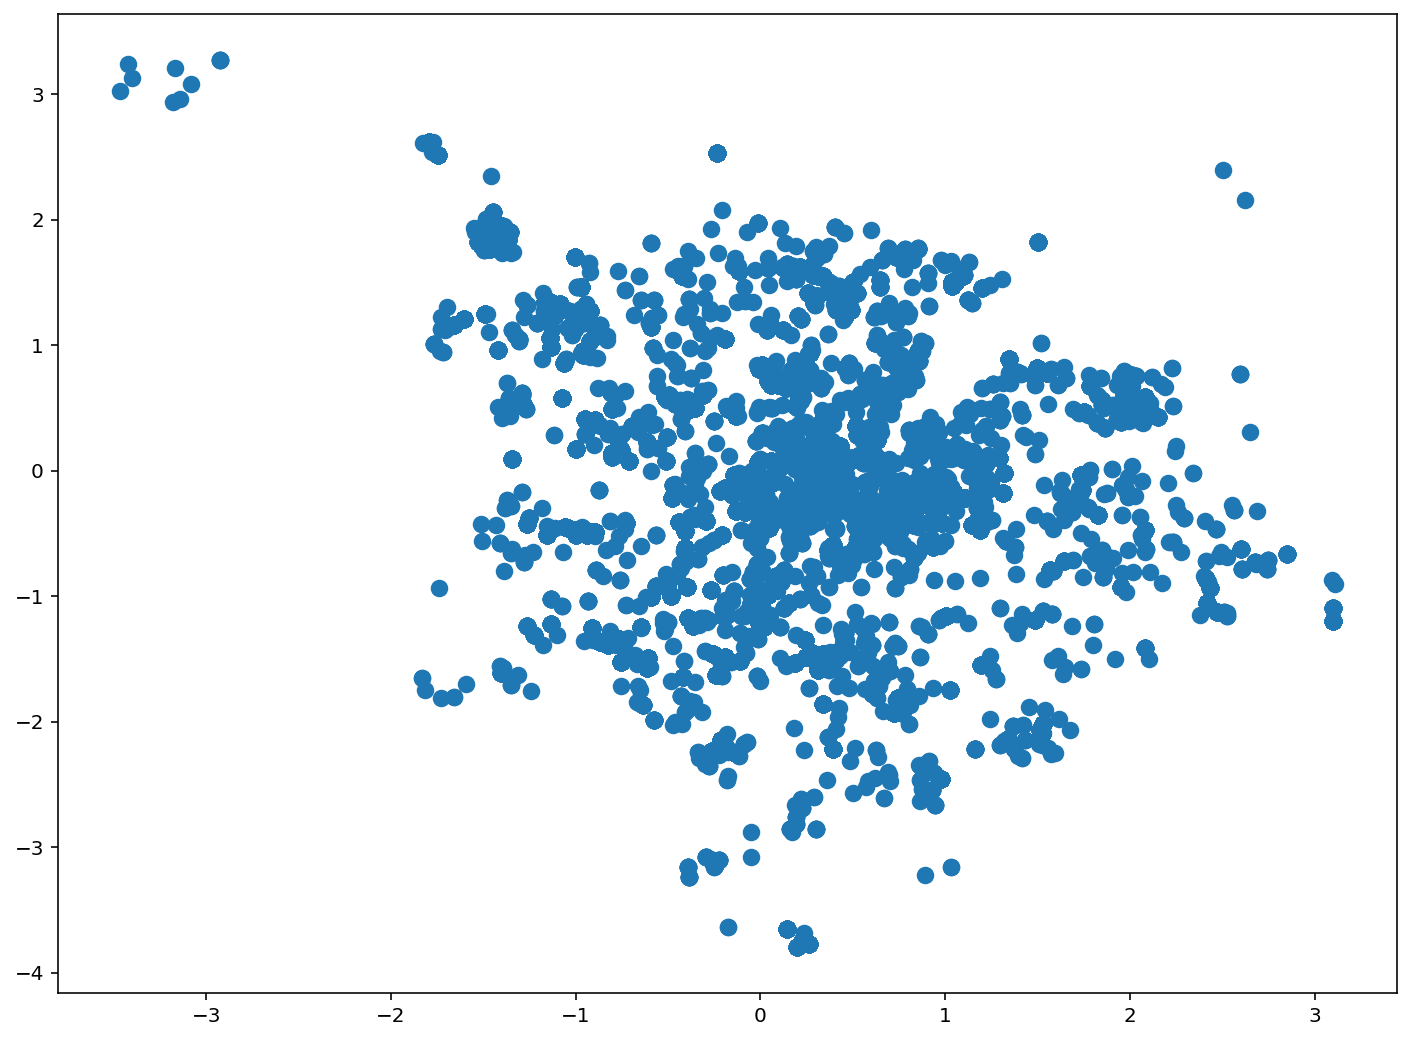

In [51]:
plt.scatter(X_scaled_0[:, 0], X_scaled_0[:, 1], cmap='autumn', s=60)

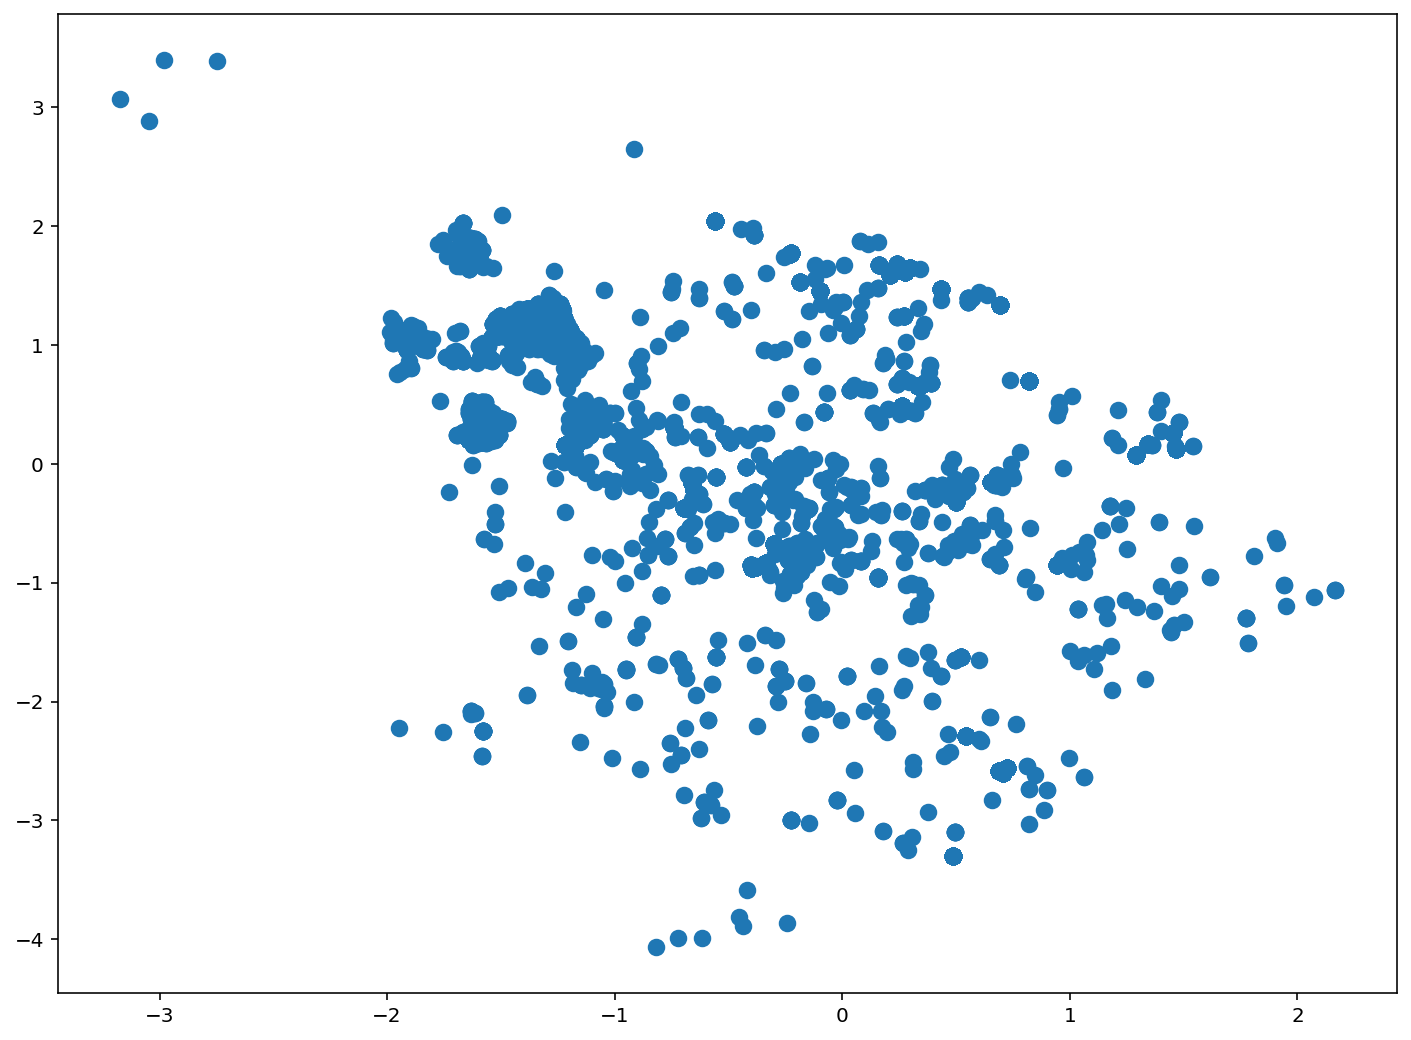

In [52]:
plt.scatter(X_scaled_1[:, 0], X_scaled_1[:, 1], cmap='autumn', s=60)

Text(0.5, 1.0, 'Kmeans - Vote - 1')

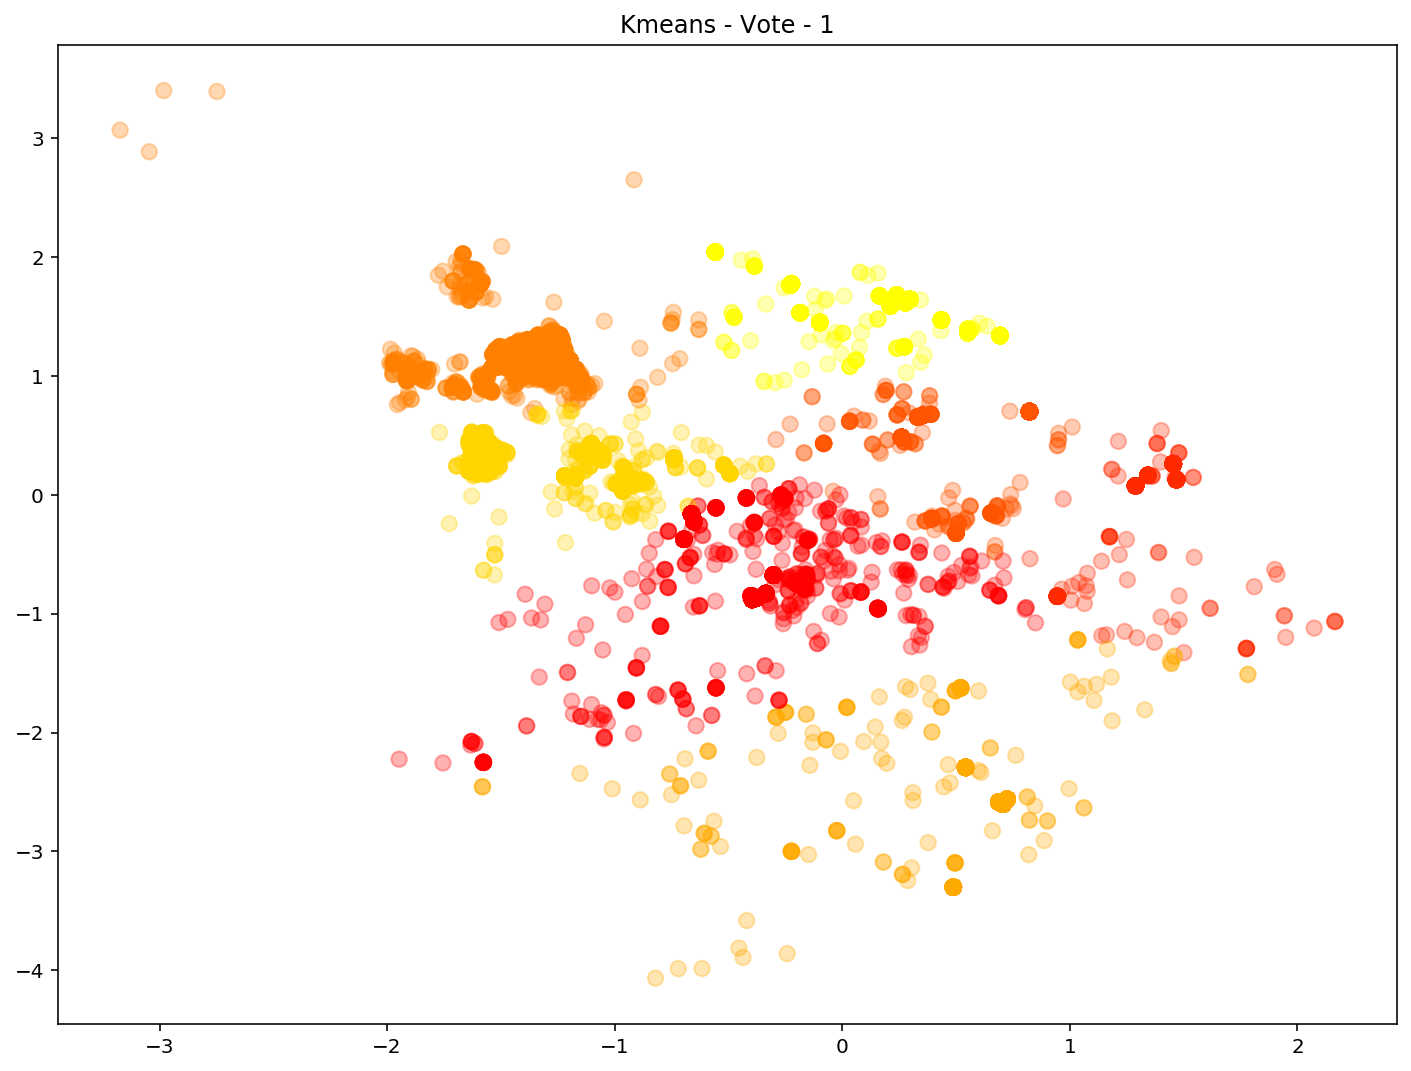

In [81]:
clusters = KMeans(n_clusters=7).fit_predict(X_scaled_1)
plt.scatter(X_scaled_1[:, 0], X_scaled_1[:, 1], c=clusters, cmap='autumn', s=60, alpha=0.3)
plt.title('Kmeans - Vote - 1')

Text(0.5, 1.0, 'Kmeans - Vote - 0')

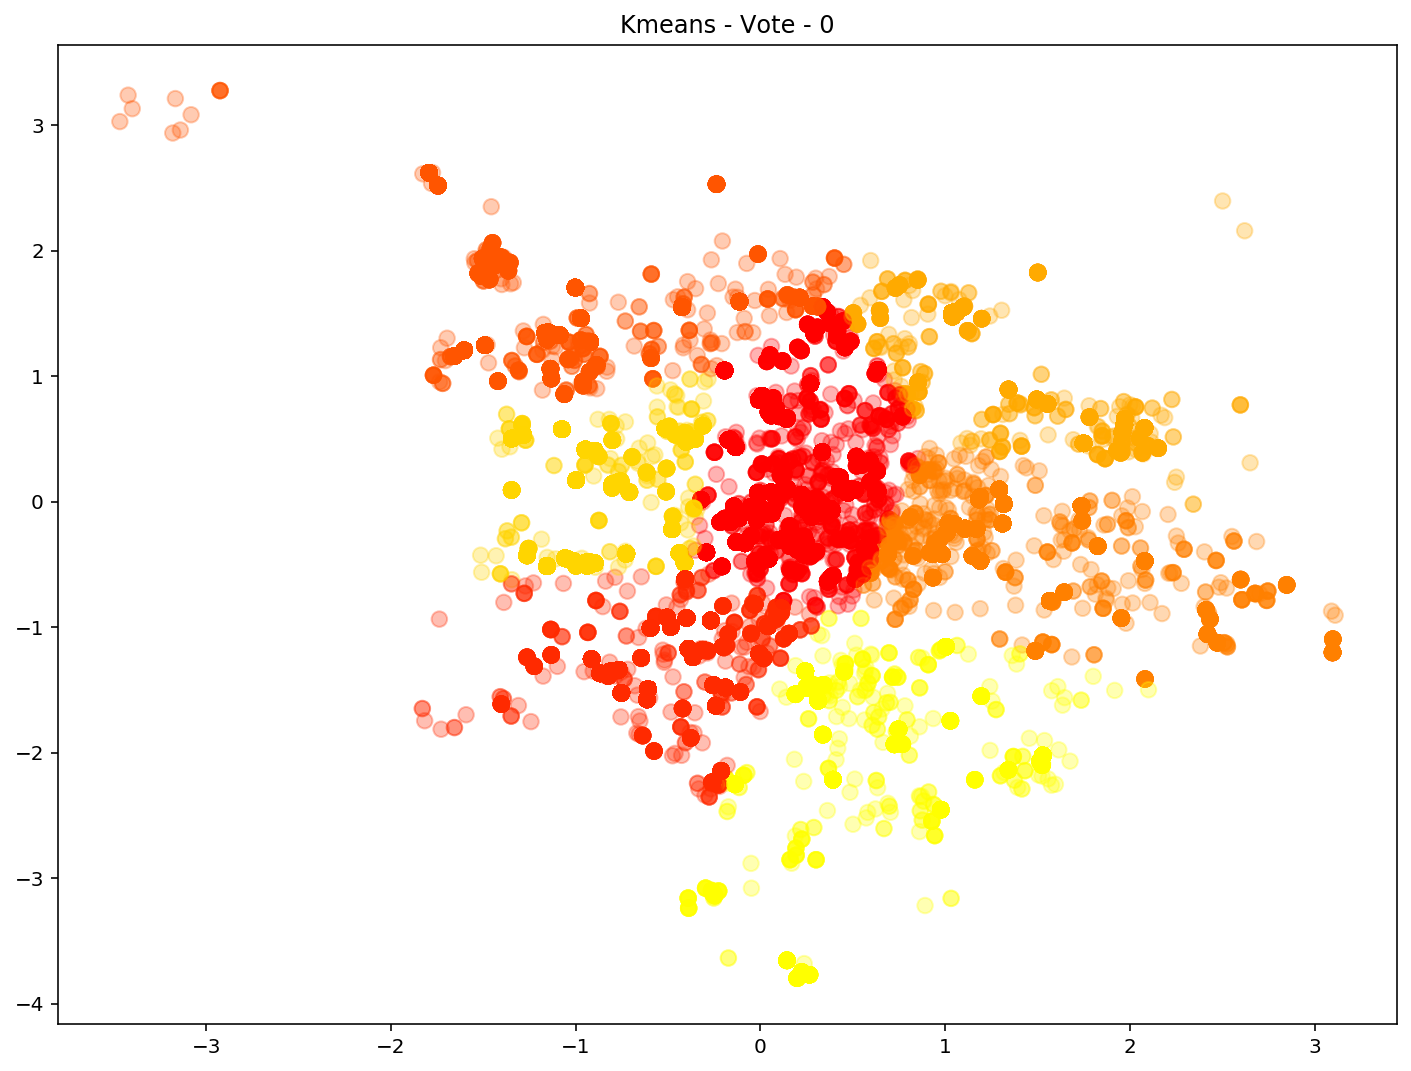

In [80]:
clusters = KMeans(n_clusters=7).fit_predict(X_scaled_0)
plt.scatter(X_scaled_0[:, 0], X_scaled_0[:, 1], c=clusters, cmap='autumn', s=60, alpha=0.3)
plt.title('Kmeans - Vote - 0')

In [78]:
k_inertia = []
ks = range(1,20)

for k in ks:
    clf_kmeans = KMeans(n_clusters=k)
    clusters_kmeans = clf_kmeans.fit_predict(X_scaled_0, )
    k_inertia.append(clf_kmeans.inertia_)

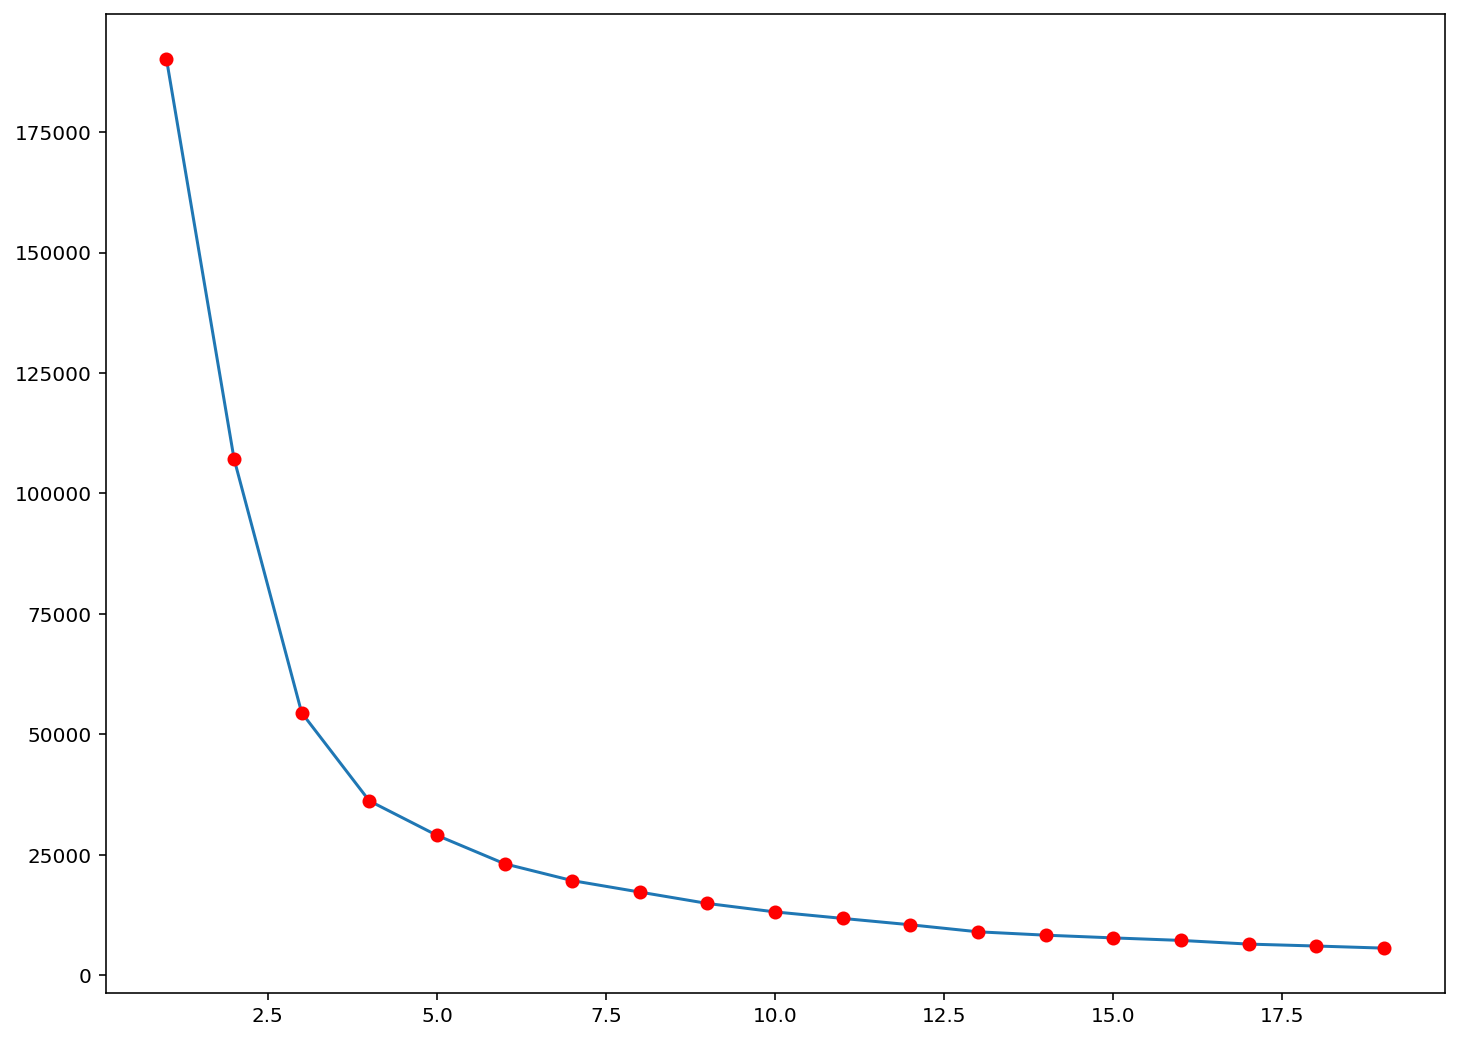

In [79]:
plt.plot(ks, k_inertia)
plt.plot(ks, k_inertia ,'ro')

График схож с графиком разделения города без учета голосов. Предлагаемео кол-во кластеров - 4

Активные районы по голосованию
=====

In [82]:
clusters = DBSCAN().fit_predict(X_scaled)

Text(0.5, 1.0, 'DBSCAN')

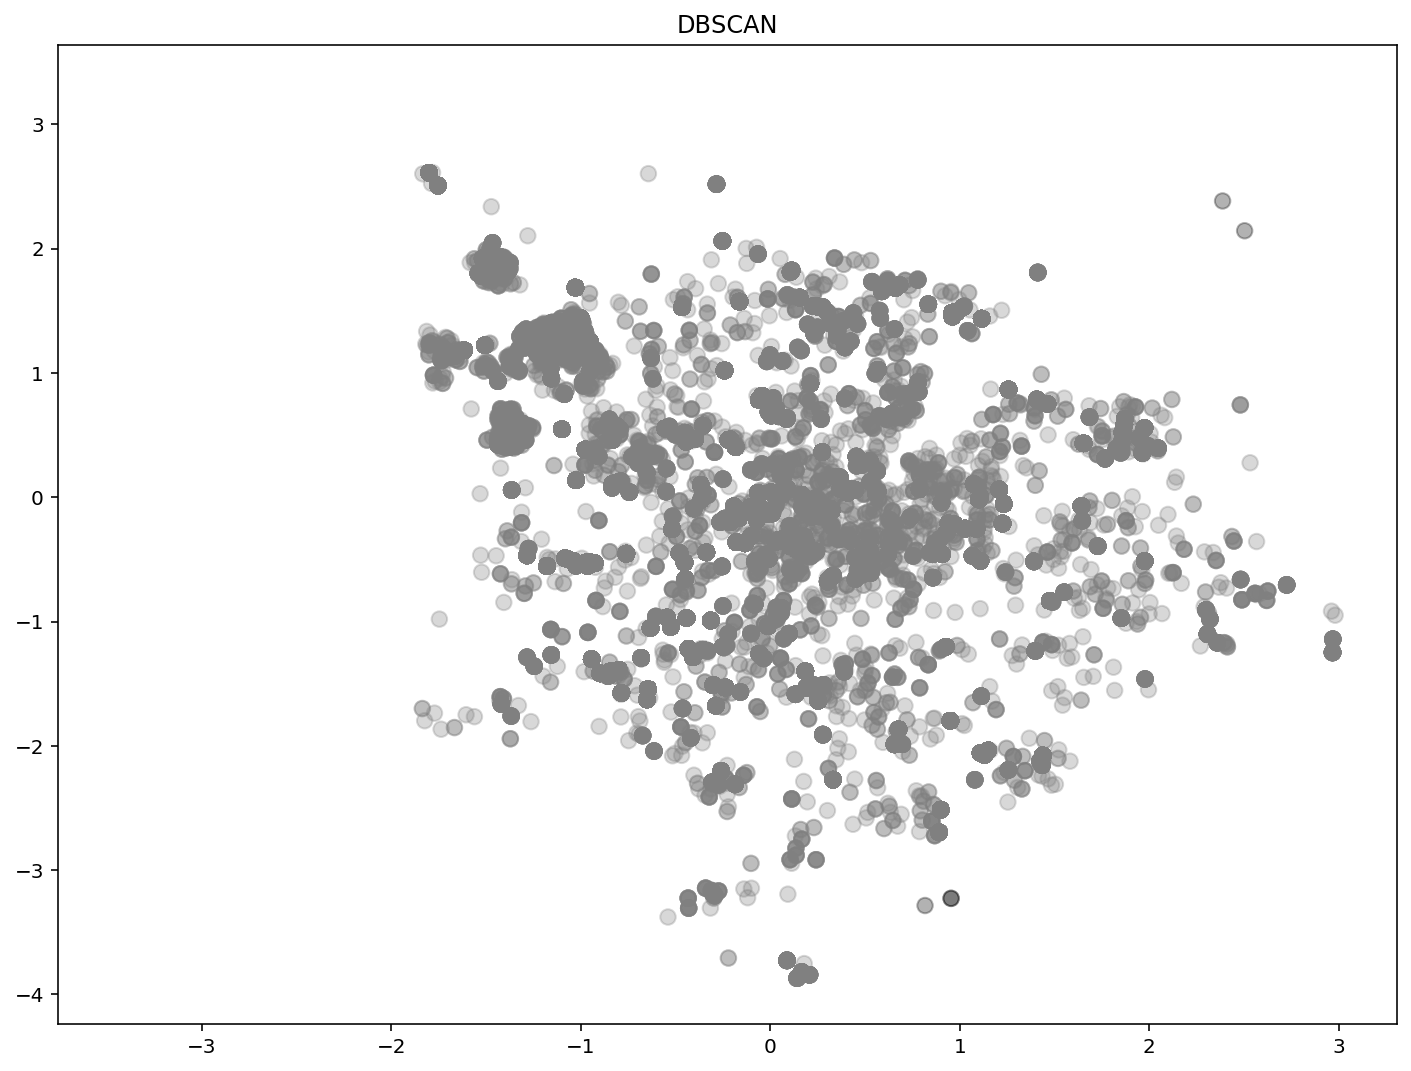

In [83]:
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap='gray', s=60, alpha=0.3)
plt.title('DBSCAN')